In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy.optimize import curve_fit

In [2]:
pop = pd.read_csv('data/china_population.txt')
GDP = pd.read_csv('data/china_gdp.csv')

In [3]:
pop = pop[['Year','Value']]
pop=pop.rename(columns={'Value':'Population'})

In [4]:
GDP=GDP.rename(columns={'Value':'GDP'})

In [5]:
pop_gdp = pd.merge(GDP,pop)

In [6]:
pop_gdp.head()

,Year,GDP,Population
0,1960,5.918412e+10,667070000
1,1961,4.955705e+10,660330000
2,1962,4.668518e+10,665770000
3,1963,5.009730e+10,682335000
4,1964,5.906225e+10,698355000


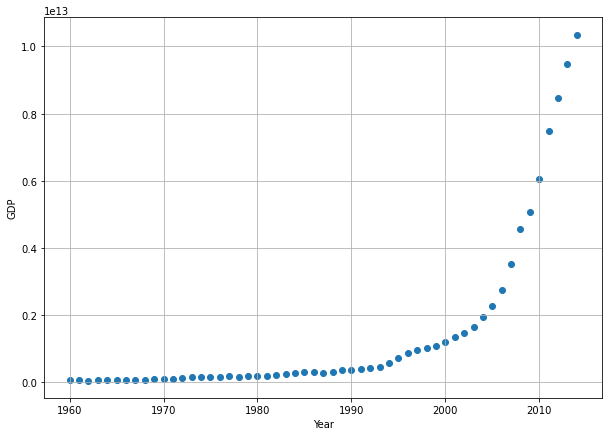

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.Year,pop_gdp.GDP)
plt.grid()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

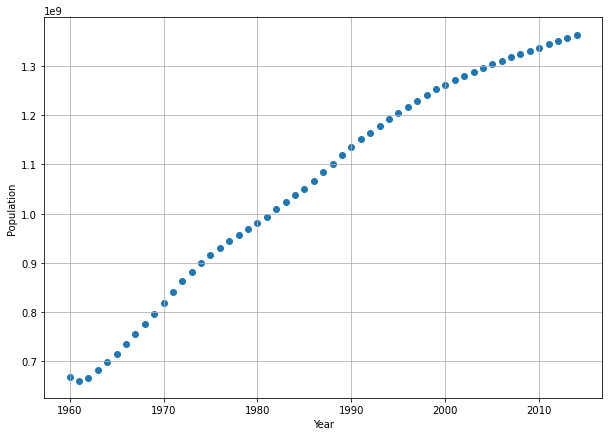

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.Year ,pop_gdp.Population)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

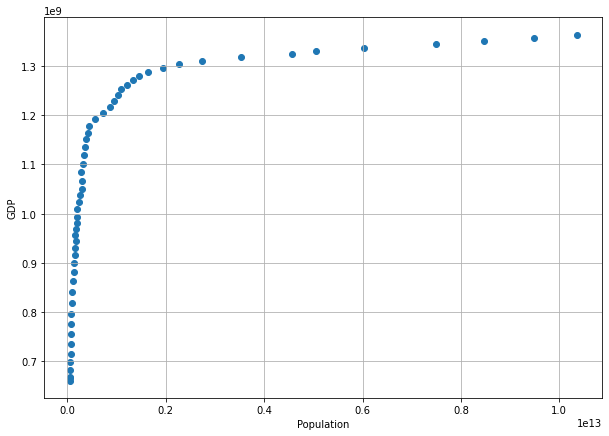

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.GDP,pop_gdp.Population )
plt.grid()
plt.ylabel('GDP')
plt.xlabel('Population')
plt.show()

In [10]:
pop_gdp.corr()

,Year,GDP,Population
Year,1.000000,0.723858,0.990633
GDP,0.723858,1.000000,0.634859
Population,0.990633,0.634859,1.000000


#### Train Data Normalization 

In [11]:
X_temp = pop_gdp[['GDP']]
X_n = preprocessing.StandardScaler().fit(X_temp).transform(X_temp)
X = pd.DataFrame(X_n, columns = ['GDP'])

#### Separating train data and test data

In [12]:
y = pop_gdp[['Population']]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [13]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.45742922e+08]]
Intercept:  [1.06849232e+09]


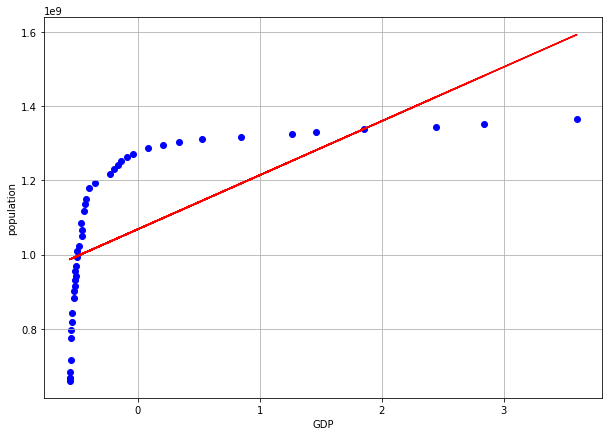

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], '-r')
plt.xlabel("GDP")
plt.ylabel("population")
plt.grid()
plt.show()

In [15]:
test_y_ = regr.predict(X_test) # we have a problem here , 10 has been changeing 

print("R2-score: %.2f" % r2_score(y_test, test_y_) )

R2-score: 0.31


#### Trying another way to generate a model

In [16]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

In [17]:
regrp = linear_model.LinearRegression()
y_train_ = regrp.fit(X_poly, y_train) 

print ('Coefficients: ', regrp.coef_)
print ('Intercept: ',regrp.intercept_)

Coefficients:  [[ 0.00000000e+00  3.53575852e+08 -9.56608040e+07]]
Intercept:  [1.15545036e+09]


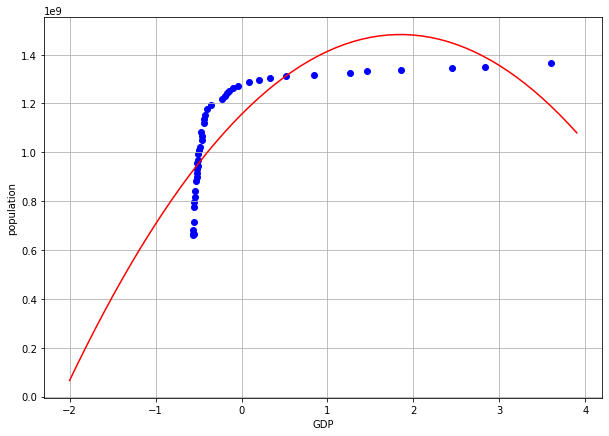

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train,  color='blue')
XX = np.arange(-2 , 4 , 0.1)
yy = regrp.intercept_[0]+ regrp.coef_[0][1]*XX+ regrp.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.grid()
plt.xlabel("GDP")
plt.ylabel("population")
plt.show()

In [19]:
X_poly_test = poly.fit_transform(X_test)
test_y_p = regrp.predict(X_poly_test)

print("R2-score: %.2f" % r2_score(y_test,test_y_p ) )

R2-score: 0.57


##### model is not fit so we try sigmoid function.

In [20]:
def sigmoid(x, a , b , c ):
    y =(1/(-a*np.exp(b*x)) + c)
    return y

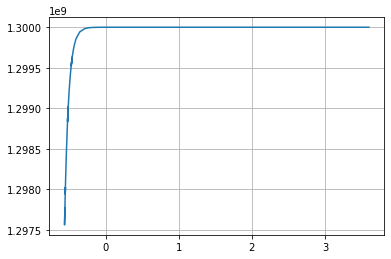

In [21]:
a =0.01
b =18
c =1300000000

Y_pred = sigmoid(X , a , b , c)

plt.plot(X, Y_pred)
plt.grid()

In [58]:
xdata = np.sort(np.array(X_train))
ydata = np.sort(np.array(y_train))

popt, pcov = curve_fit(sigmoid, xdata.reshape(-1,) , ydata.reshape(-1,),p0=(0.01, 18,1300000000 ))

print(" a = %f, b = %f c = %f"% (popt[0], popt[1] , popt[2]))

 a = 0.000001, b = 10.522415 c = 1299528650.474475


C:\Users\lenovo\AppData\Local\Temp/ipykernel_3644/2341570082.py:2: RuntimeWarning: overflow encountered in exp
  y =(1/(-a*np.exp(b*x)) + c)
C:\Users\lenovo\AppData\Local\Temp/ipykernel_3644/2341570082.py:2: RuntimeWarning: divide by zero encountered in true_divide
  y =(1/(-a*np.exp(b*x)) + c)
C:\Users\lenovo\AppData\Local\Temp/ipykernel_3644/2341570082.py:2: RuntimeWarning: overflow encountered in true_divide
  y =(1/(-a*np.exp(b*x)) + c)


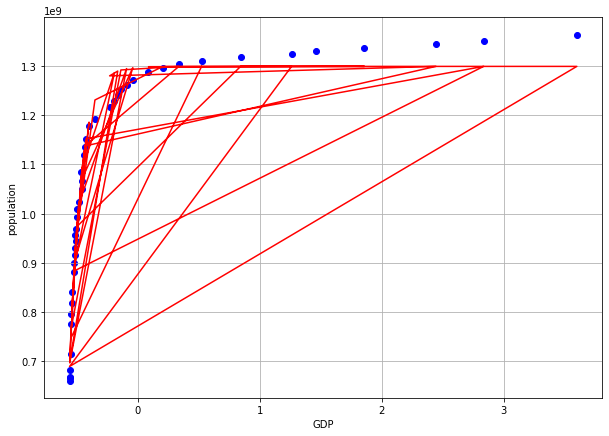

In [55]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train , sigmoid(X_train , popt[0], popt[1] ,popt[2]) , color='red')
plt.grid()
plt.xlabel("GDP")
plt.ylabel("population")
plt.show()

In [25]:
test_y_s = sigmoid(X_test ,popt[0],popt[1] ,popt[2])
print("R2-score: %.2f" % r2_score(y_test,test_y_s ))

R2-score: -0.07
